In [1]:
'''Our purpose is to predict price of bitcoin in the future based on previous data. 
As this is a problem to predict value in future, we should think of some time-series method.
We've learn something about neural network,

%matplotlib inline

# Data Preprocessing: explore useful data, fullfill the empty data.

In [2]:
%pwd

'/Users/tongzhou/workspace/6105/final'

In [4]:
path = '/Users/tongzhou/workspace/6105/final'

In [5]:
''' The first step is to explore useful data. 
As we think the whole dataset is too huge, and some years are too far away and may not be useful, we only use the data
after 2014-12-01'''

def dateparse (time_in_secs):
    return pytz.utc.localize(dt.datetime.fromtimestamp(float(time_in_secs)))
df = pd.read_csv(f'{path}/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', parse_dates=[0], date_parser=dateparse)
print(df.shape)
df.head(10)

(2099760, 8)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-11-30 21:33:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-11-30 21:34:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-11-30 21:35:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-11-30 21:36:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-11-30 21:37:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-11-30 21:38:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-11-30 21:39:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-11-30 21:40:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
8,2014-11-30 21:41:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-11-30 21:42:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check the info, seems that no string types, so no need to convert to category types. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 8 columns):
Timestamp            datetime64[ns, UTC]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 128.2 MB


In [7]:
''' However, there are still many missing data, so we have to fullfill them. 
We know that if during the time spot it shows 'NaN', it means there was no transaction that time spot. 
So we fullfill the volume and price with '0'   '''

df['Volume_(BTC)'] = df['Volume_(BTC)'].fillna('0')
df['Volume_(Currency)'] = df['Volume_(Currency)'].fillna('0')
df['Weighted_Price'] = df['Weighted_Price'].fillna('0')

df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-11-30 21:33:00+00:00,300.0,300.0,300.0,300.0,0.01,3,300
1,2014-11-30 21:34:00+00:00,NaN,NaN,NaN,NaN,0,0,0
2,2014-11-30 21:35:00+00:00,NaN,NaN,NaN,NaN,0,0,0
3,2014-11-30 21:36:00+00:00,NaN,NaN,NaN,NaN,0,0,0
4,2014-11-30 21:37:00+00:00,NaN,NaN,NaN,NaN,0,0,0
5,2014-11-30 21:38:00+00:00,NaN,NaN,NaN,NaN,0,0,0
6,2014-11-30 21:39:00+00:00,NaN,NaN,NaN,NaN,0,0,0
7,2014-11-30 21:40:00+00:00,300.0,300.0,300.0,300.0,0.01,3,300
8,2014-11-30 21:41:00+00:00,NaN,NaN,NaN,NaN,0,0,0
9,2014-11-30 21:42:00+00:00,NaN,NaN,NaN,NaN,0,0,0


In [8]:
'''Also we should fullfill the open, high, low, close price.
Here we should fullfill each NaN with last non-NaN value.'''

df['Open'].fillna(method='ffill', inplace=True)
df['High'].fillna(method='ffill', inplace=True)
df['Low'].fillna(method='ffill', inplace=True)
df['Close'].fillna(method='ffill', inplace=True)

print(df.shape)
df.head(5)

(2099760, 8)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-11-30 21:33:00+00:00,300.0,300.0,300.0,300.0,0.01,3,300
1,2014-11-30 21:34:00+00:00,300.0,300.0,300.0,300.0,0,0,0
2,2014-11-30 21:35:00+00:00,300.0,300.0,300.0,300.0,0,0,0
3,2014-11-30 21:36:00+00:00,300.0,300.0,300.0,300.0,0,0,0
4,2014-11-30 21:37:00+00:00,300.0,300.0,300.0,300.0,0,0,0


//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


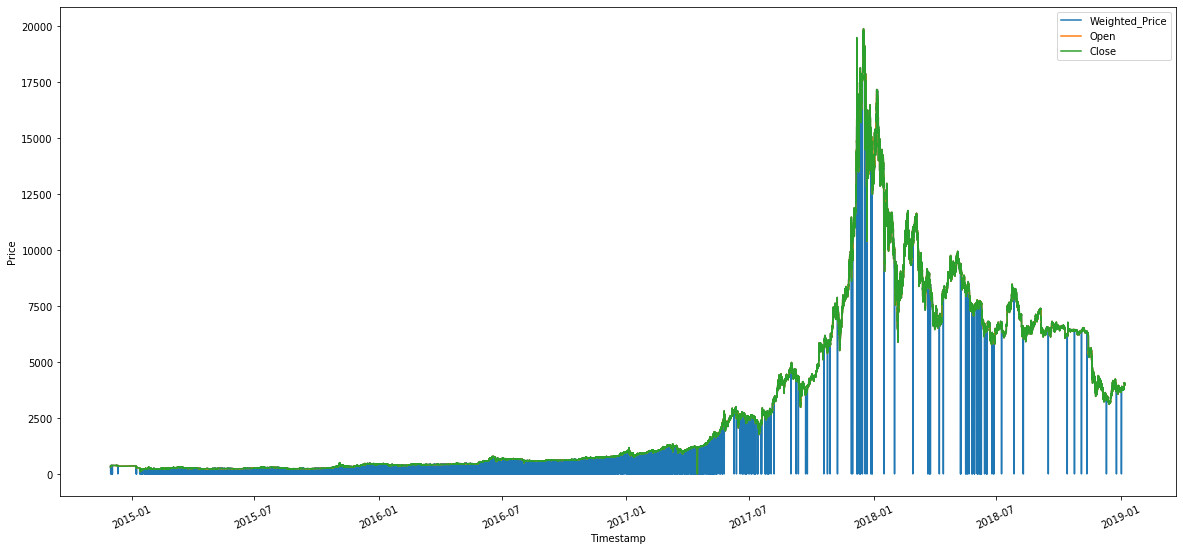

In [9]:
# Use plot to show relationship of price and time stamp

plt.figure(figsize = (20,10))

plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.plot(df['Timestamp'], df['Weighted_Price'], label='Weighted_Price')
plt.plot(df['Timestamp'], df['Open'], label='Open')
plt.plot(df['Timestamp'], df['Close'], label='Close')
plt.ylabel('Price')
plt.xlabel('Timestamp')
plt.legend(loc='best')

Text(0.5, 0, 'Timestamp')

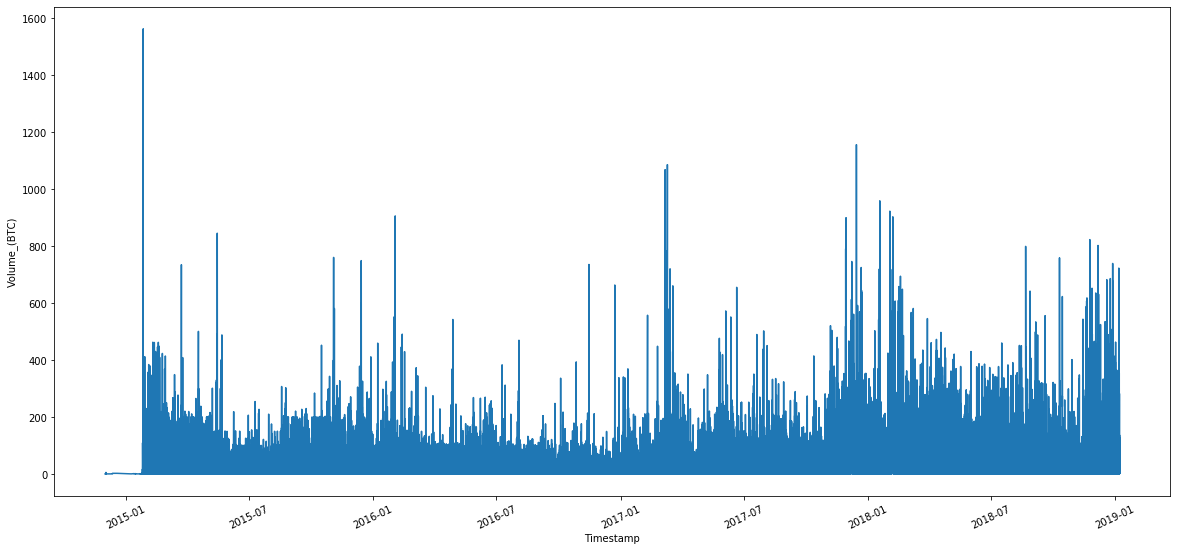

In [10]:
# Use plot to show relationship of bitcoin volume and time stamp

plt.figure(figsize = (20,10))
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.plot(df['Timestamp'], df['Volume_(BTC)'], label='Volume_(BTC)')
plt.ylabel('Volume_(BTC)')
plt.xlabel('Timestamp')

Text(0.5, 0, 'Timestamp')

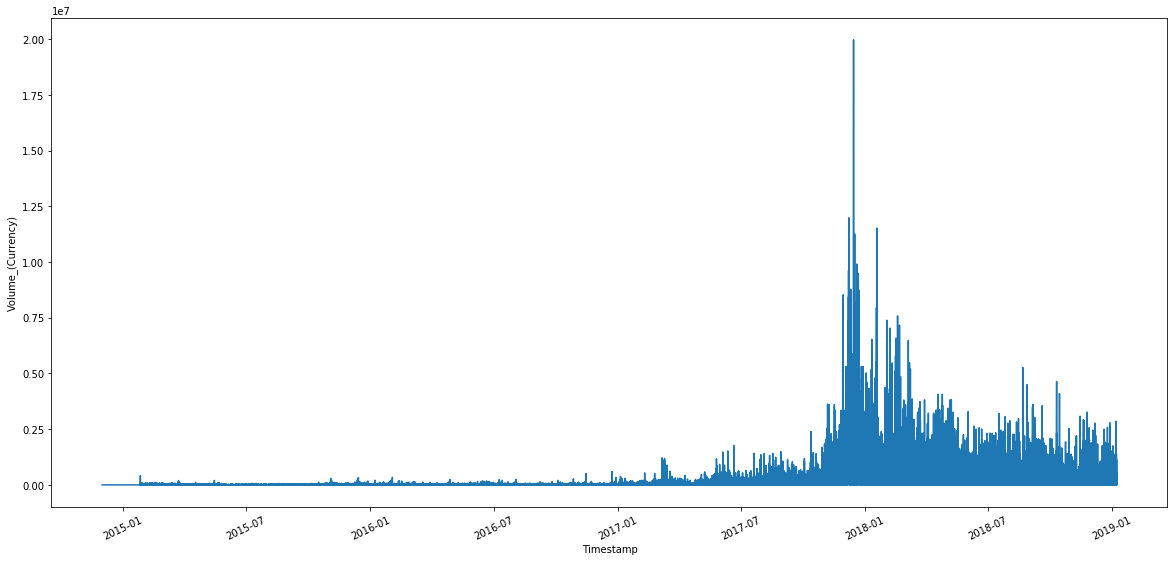

In [11]:
# Use plot to show relationship of currency volume and time stamp

plt.figure(figsize = (20,10))
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.plot(df['Timestamp'], df['Volume_(Currency)'], label='Volume_(Currency)')
plt.ylabel('Volume_(Currency)')
plt.xlabel('Timestamp')

Text(0.5, 0, 'Weighted_Price')

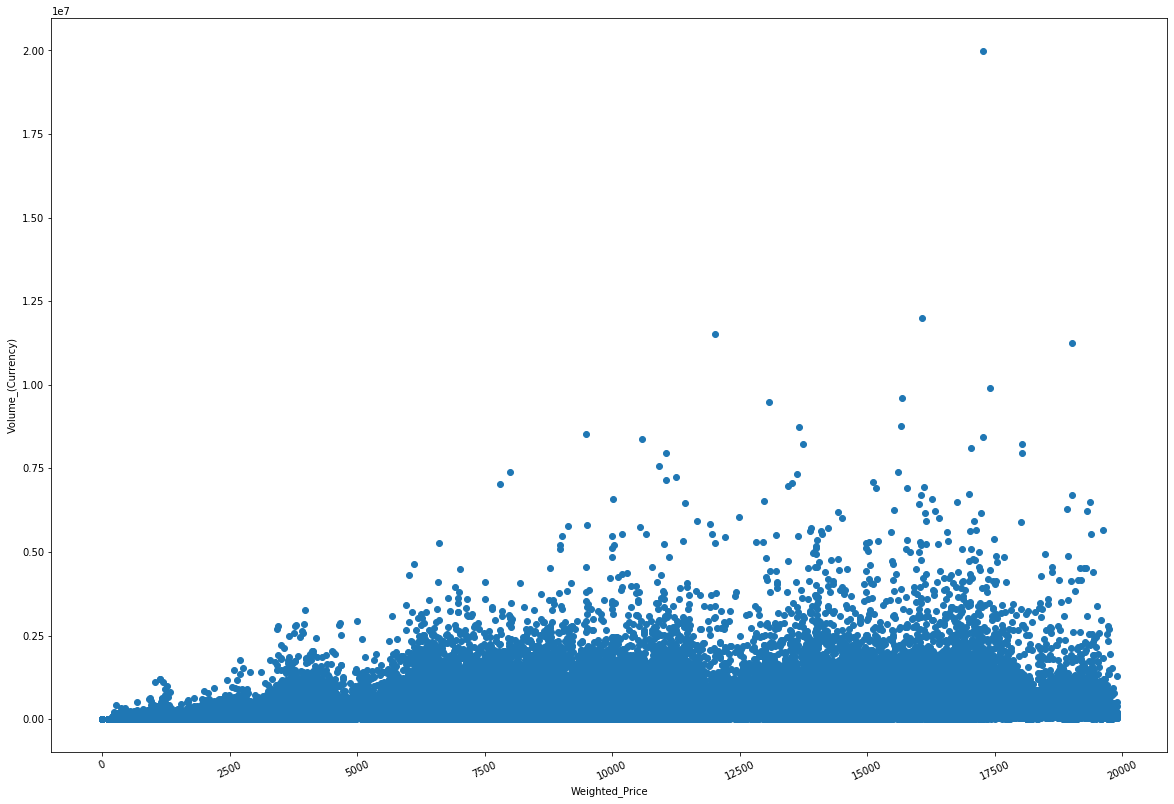

In [12]:
# Show relationship between currency volume and price

plt.figure(figsize = (20,15))
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.scatter(df['Weighted_Price'], df['Volume_(Currency)'])
plt.ylabel('Volume_(Currency)')
plt.xlabel('Weighted_Price')

Text(0.5, 0, 'Weighted_Price')

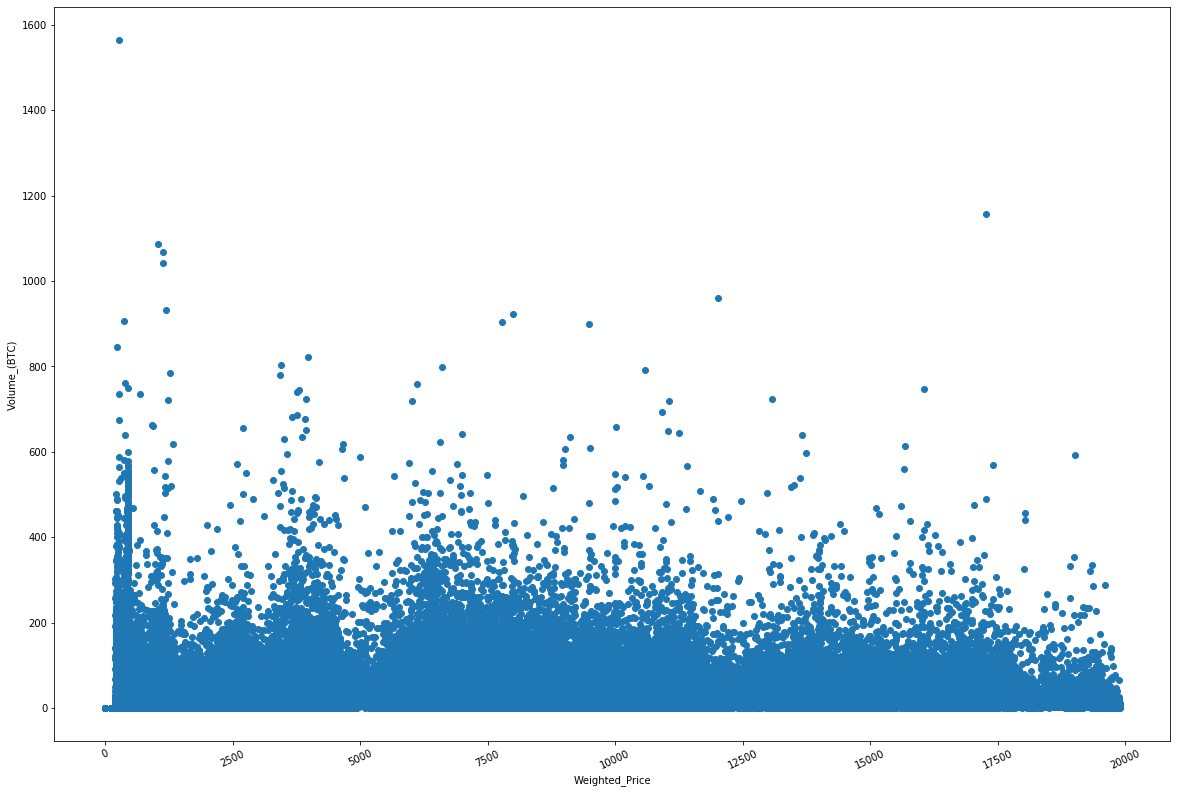

In [13]:
# Show relationship between bitcoin volume and price

plt.figure(figsize = (20,15))
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.scatter(df['Weighted_Price'], df['Volume_(BTC)'])
plt.ylabel('Volume_(BTC)')
plt.xlabel('Weighted_Price')

In [14]:
df['Timestamp'] = df['Timestamp'].dt.tz_localize(None)
df = df.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
print(df.shape)
df.head(5)

(35970, 8)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-11-30 21:00:00,300.0,300.0,300.0,300.0,0.01,3,300
1,2014-11-30 22:00:00,300.0,300.0,300.0,300.0,0,0,0
2,2014-11-30 23:00:00,370.0,370.0,370.0,370.0,0,0,0
3,2014-12-01 00:00:00,370.0,370.0,370.0,370.0,0,0,0
4,2014-12-01 01:00:00,370.0,370.0,370.0,370.0,0,0,0


In [15]:
df1 = df.set_index('Timestamp')
df1 = df1[['Weighted_Price']]
df1['Weighted_Price'].fillna(method='ffill', inplace=True)
print(df1.shape)
df1.head(5)

(35970, 1)


,Weighted_Price
Timestamp,
2014-11-30 21:00:00,300
2014-11-30 22:00:00,0
2014-11-30 23:00:00,0
2014-12-01 00:00:00,0
2014-12-01 01:00:00,0


# train-valid-test split

In [16]:
#Train- validation- Test Split: 70%-15%-15%
#there were 35970 hours between 2014-12-01 to 2019-01-09
#Train: 25179 hours from 2014-12-01 to 2017-10-15
#Validation: 5395 hours from 2017-10-15 to 2018-05-27
#Test: 5396 hours from 2018-05-27 to 2019-01-09
#Define split function
def df_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]

data_train, data_valid_test = df_splitter(df1, 25179)
data_valid, data_test = df_splitter(data_valid_test, 5395)
print(data_train.shape, data_valid.shape, data_test.shape)

(25179, 1) (5395, 1) (5396, 1)


In [17]:
# Data preprocess
training_set = data_train.values
training_set1 = np.reshape(training_set, (len(training_set), 1))
valid_set = data_valid.values
valid_set1 = np.reshape(valid_set, (len(valid_set), 1))

# Scaling/standard
sc = MinMaxScaler()
training_set2 = sc.fit_transform(training_set1)
valid_set2 = sc.fit_transform(valid_set1)

#Split x and y
X_train = training_set2[0:len(training_set2)-1]
Y_train = training_set2[1:len(training_set2)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))
X_valid = valid_set2[0:len(valid_set2)-1]
Y_valid = valid_set2[1:len(valid_set2)]
X_valid = np.reshape(X_valid, (len(X_valid), 1, 1))

# Build model

# Build model and Fine-tuning hyper-parameters

In [18]:
#Tuning hyper-parameters with different batch size
#for big dataset, usually batch size should bigger than 15, smaller than 128, so here so batch size in [20, 40, 60, 80, 100]
batch_size_list = [20, 40, 60, 80, 100]
model_list = []
for batch in batch_size_list:
   
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    # Compile the LSTM
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
    
    #Tune hyper-parameters with validation data
    model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=50, batch_size=batch, verbose=2)
    model_list.append(model)

Train on 25178 samples, validate on 5394 samples
Epoch 1/50
25178/25178 - 4s - loss: 0.0279 - mean_absolute_error: 0.1254 - val_loss: 0.0058 - val_mean_absolute_error: 0.0600
Epoch 2/50
25178/25178 - 2s - loss: 0.0074 - mean_absolute_error: 0.0667 - val_loss: 0.0049 - val_mean_absolute_error: 0.0578
Epoch 3/50
25178/25178 - 2s - loss: 0.0044 - mean_absolute_error: 0.0511 - val_loss: 0.0025 - val_mean_absolute_error: 0.0322
Epoch 4/50
25178/25178 - 2s - loss: 0.0033 - mean_absolute_error: 0.0434 - val_loss: 0.0015 - val_mean_absolute_error: 0.0199
Epoch 5/50
25178/25178 - 2s - loss: 0.0026 - mean_absolute_error: 0.0383 - val_loss: 0.0019 - val_mean_absolute_error: 0.0250
Epoch 6/50
25178/25178 - 2s - loss: 0.0022 - mean_absolute_error: 0.0342 - val_loss: 0.0014 - val_mean_absolute_error: 0.0136
Epoch 7/50
25178/25178 - 2s - loss: 0.0019 - mean_absolute_error: 0.0310 - val_loss: 0.0013 - val_mean_absolute_error: 0.0108
Epoch 8/50
25178/25178 - 2s - loss: 0.0017 - mean_absolute_error: 0.0

Epoch 15/50
25178/25178 - 1s - loss: 0.0016 - mean_absolute_error: 0.0273 - val_loss: 0.0013 - val_mean_absolute_error: 0.0133
Epoch 16/50
25178/25178 - 1s - loss: 0.0015 - mean_absolute_error: 0.0264 - val_loss: 0.0014 - val_mean_absolute_error: 0.0169
Epoch 17/50
25178/25178 - 1s - loss: 0.0014 - mean_absolute_error: 0.0258 - val_loss: 0.0012 - val_mean_absolute_error: 0.0081
Epoch 18/50
25178/25178 - 1s - loss: 0.0014 - mean_absolute_error: 0.0250 - val_loss: 0.0012 - val_mean_absolute_error: 0.0098
Epoch 19/50
25178/25178 - 1s - loss: 0.0013 - mean_absolute_error: 0.0245 - val_loss: 0.0012 - val_mean_absolute_error: 0.0102
Epoch 20/50
25178/25178 - 1s - loss: 0.0013 - mean_absolute_error: 0.0238 - val_loss: 0.0014 - val_mean_absolute_error: 0.0167
Epoch 21/50
25178/25178 - 2s - loss: 0.0013 - mean_absolute_error: 0.0235 - val_loss: 0.0012 - val_mean_absolute_error: 0.0102
Epoch 22/50
25178/25178 - 1s - loss: 0.0012 - mean_absolute_error: 0.0230 - val_loss: 0.0013 - val_mean_absolut

Epoch 29/50
25178/25178 - 1s - loss: 0.0013 - mean_absolute_error: 0.0237 - val_loss: 0.0015 - val_mean_absolute_error: 0.0202
Epoch 30/50
25178/25178 - 1s - loss: 0.0012 - mean_absolute_error: 0.0230 - val_loss: 0.0015 - val_mean_absolute_error: 0.0193
Epoch 31/50
25178/25178 - 1s - loss: 0.0012 - mean_absolute_error: 0.0226 - val_loss: 0.0013 - val_mean_absolute_error: 0.0124
Epoch 32/50
25178/25178 - 1s - loss: 0.0012 - mean_absolute_error: 0.0225 - val_loss: 0.0015 - val_mean_absolute_error: 0.0195
Epoch 33/50
25178/25178 - 1s - loss: 0.0012 - mean_absolute_error: 0.0219 - val_loss: 0.0012 - val_mean_absolute_error: 0.0093
Epoch 34/50
25178/25178 - 1s - loss: 0.0011 - mean_absolute_error: 0.0218 - val_loss: 0.0015 - val_mean_absolute_error: 0.0203
Epoch 35/50
25178/25178 - 1s - loss: 0.0011 - mean_absolute_error: 0.0216 - val_loss: 0.0012 - val_mean_absolute_error: 0.0098
Epoch 36/50
25178/25178 - 1s - loss: 0.0011 - mean_absolute_error: 0.0213 - val_loss: 0.0018 - val_mean_absolut

Epoch 44/50
25178/25178 - 1s - loss: 0.0011 - mean_absolute_error: 0.0211 - val_loss: 0.0013 - val_mean_absolute_error: 0.0142
Epoch 45/50
25178/25178 - 1s - loss: 0.0011 - mean_absolute_error: 0.0208 - val_loss: 0.0013 - val_mean_absolute_error: 0.0135
Epoch 46/50
25178/25178 - 1s - loss: 0.0011 - mean_absolute_error: 0.0207 - val_loss: 0.0013 - val_mean_absolute_error: 0.0121
Epoch 47/50
25178/25178 - 1s - loss: 0.0011 - mean_absolute_error: 0.0207 - val_loss: 0.0012 - val_mean_absolute_error: 0.0099
Epoch 48/50
25178/25178 - 1s - loss: 0.0011 - mean_absolute_error: 0.0202 - val_loss: 0.0013 - val_mean_absolute_error: 0.0116
Epoch 49/50
25178/25178 - 1s - loss: 0.0010 - mean_absolute_error: 0.0200 - val_loss: 0.0015 - val_mean_absolute_error: 0.0181
Epoch 50/50
25178/25178 - 1s - loss: 0.0011 - mean_absolute_error: 0.0201 - val_loss: 0.0013 - val_mean_absolute_error: 0.0113
Train on 25178 samples, validate on 5394 samples
Epoch 1/50
25178/25178 - 2s - loss: 0.0513 - mean_absolute_err

# Evaluating model performance

In [19]:
#Use Mean Absolute Error as Performance metrics to evaluate performance using test data
score_list = []

test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
BTC_price_test = data_test['Weighted_Price']

for model in model_list:
    predicted_BTC_price = model.predict(inputs)
    predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)
    
    score = mean_absolute_error(BTC_price_test, predicted_BTC_price)
    score_list.append(score)

print (score_list)

[500.0670842823971, 216.26475513626852, 398.76281679498777, 222.02519641513194, 259.05349220498204]


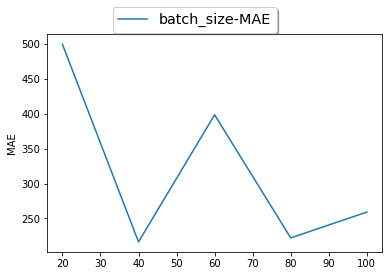

In [20]:
#Report MAE of each model with different batch size
fig, ax = plt.subplots()
plt.plot(batch_size_list, score_list, label="batch_size-MAE")
plt.ylabel("MAE")
legend = fig.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()

Since Mean Absolute Error is the difference between the measured value and “true” value, the value of MAE is the smaller the better. In conclusion, the model with batch size=40 has the best result

Team: Money Grabber
Linke Wang: wang.link@husky.neu.edu
Runzhao Li: li.runzh@husky.neu.edu
Shuyuan Zhou: zhou.shuy@husky.neu.edu
Tong Zhou: zhou.to@husky.neu.edu